In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import sklearn.linear_model

n = 100
x = numpy.random.rand(n)
y1 = 2 * x + numpy.random.rand(n) * 0.1
y2 = 4 * x - 2 + numpy.random.rand(n) * 0.5
df1 = pandas.DataFrame({"x": x, "y": y1})
df2 = pandas.DataFrame({"x": x, "y": y2})
df = pandas.concat([df1, df2], axis=0).reset_index(drop=True)

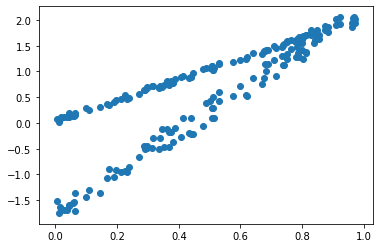

In [2]:
plt.scatter(df["x"], df["y"])
plt.show()

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
model = LinearRegression()
x_arr, y_arr = numpy.array(df[["x"]]), numpy.array(df[["y"]])
model.fit(x_arr, y_arr)
model.intercept_, model.coef_

(array([-0.85566611]), array([[3.0122705]]))

In [5]:
import math
import scipy.optimize

h = 0.00001

class MyLinearRegression(object):
    
    def __init__(self):
        self.p = None
        
    def predict(self, x):
        x2 = self.append_intercept(x)
        return self._f(self.p, x2)

    def _f(self, p, x):
        return (x * p).sum(axis=1)

    def loss(self, y_true, y_pred):
        return ((y_true - y_pred) ** 2).sum()

    def partial_diff(self, f, p):
        pd = numpy.zeros(len(p))
        for i in range(len(p)):
            p1 = p.copy()
            p1[i] += h
            p2 = p.copy()
            p2[i] -= h
            pd[i] = (f(p1) - f(p2)) / 2
        return pd

    def append_intercept(self, x):
        intercept = numpy.ones(len(x)).reshape(-1, 1)
        x2 = numpy.concatenate([x, intercept], axis=1)
        return x2
    
    def fit(self, x, y, split_num=14):
        x2 = self.append_intercept(x)
        # 逆順してsplit_numごとに分割先頭のいくつかはsplitに不要分は除外される
        split_arr_x = numpy.array_split(x2[::-1], len(x2) // split_num)
        split_arr_y = numpy.array_split(y[::-1], len(y) // split_num)
        
        itr = 0
        # 逆順に取得して先頭からデータを取り出す
        for arr_x, arr_y in zip(split_arr_x[::-1], split_arr_y[::-1]):
            if itr == 0:
                self.train(arr_x, arr_y, itr=1000)
            else:
                self.train(arr_x, arr_y, init_p=self.p, itr=20)
            itr += 1
            print(self.p)
        
    
    def train(self, x, y, init_p=None, itr=1000, epsilon=0.000001):
        if init_p is None:
            init_p = numpy.zeros(x2.shape[1])
        f = lambda p: self.loss(y, self._f(p, x))
        f_prime = lambda p: self.partial_diff(f, p)
        p = init_p
        v = f(p)
        for i in range(itr):
            grad = self.partial_diff(f, p)
            step =  scipy.optimize.line_search(f, f_prime, xk=p, pk=-grad)[0]
            #print(step)
            if step is None:
                print("converged: step is None")
                break                
            p = p - step * grad
            vn = f(p)
            if math.fabs((v - vn)/v) <= epsilon:
                print("converged")
                break
            v = vn
        self.p = p        

In [6]:
self = MyLinearRegression()

In [7]:
x = numpy.array(df[["x"]])
y = numpy.array(df["y"])
self.fit(x, y)

NameError: name 'x2' is not defined